In [2]:
import sys; sys.path.append('..')
import inflation, mesh, sheet_meshing
from tri_mesh_viewer import TriMeshViewer as Viewer
import triangulation
import numpy as np
import utils, py_newton_optimizer, benchmark 

In [3]:
  V, E = mesh.load_raw('data/ForwardDesign/hinge.obj')
  fusedPts = list(np.loadtxt('data/ForwardDesign/fusehingev2.txt').reshape((-1, 2)))
  holePts = []  # or load from file if you want, but it should be empty

In [4]:
m, iwv, iwbv = sheet_meshing.forward_design_mesh(V, E, fusedPts, holePts, np.prod(utils.bbox_dims(V)[0:2]) / 1e4)
isheet = inflation.InflatableSheet(m, iwv)

Renderer(camera=PerspectiveCamera(children=(PointLight(color='#999999', position=(0.0, 0.0, 5.0), quaternion=(…

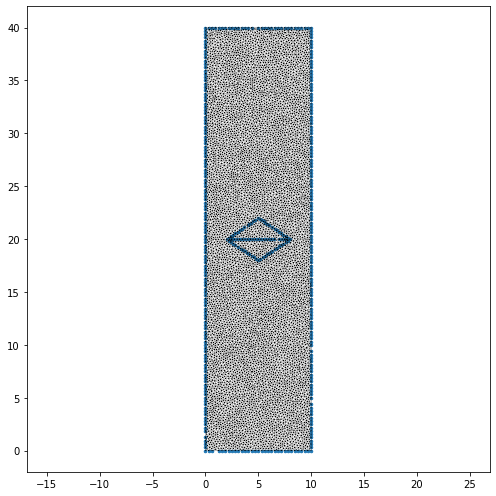

In [5]:
import visualization
visualization.plot_2d_mesh(m, pointList=np.where(iwv))

viewer = Viewer(isheet, wireframe=True)
viewer.show()

In [6]:
import time
import benchmark
import py_newton_optimizer

benchmark.reset()
isheet.setUseTensionFieldEnergy(True)
isheet.setUseHessianProjectedEnergy(False)
opts = py_newton_optimizer.NewtonOptimizerOptions()
opts.niter = 500
isheet.pressure = 1

# If you want to see the inflation progress in the viewer:
framerate = 5  # Update every 5 iterations
def cb(it):
    if it % framerate == 0:
        viewer.update()

cr = inflation.inflation_newton(isheet, isheet.rigidMotionPinVars, opts, callback=cb)
benchmark.report()

InflatableSheet setVars	0.00171185	1
Newton iterations	110.711	1
    InflatableSheet energy	0.00039506	1
    Newton iterate	110.71	156
        Backtracking	0.746639	155
            InflatableSheet energy	0.137381	230
            InflatableSheet setVars	0.597547	230
        Compute descent direction	107.407	155
            newton_step	107.406	155
                Newton solve	103.513	253
                    CHOLMOD Numeric Factorize	100.82	252
                    Solve	1.67594	156
                        CHOLMOD Backsub	1.3906	155
                        CHOLMOD Numeric Factorize	0.0564818	1
                        CHOLMOD Symbolic Factorize	0.2075	1
                hessEval	3.70984	155
                largestMagnitudeEigenvalue	0.0700538	3
        Preamble	2.509	156
            Callback	2.21806	156
            InflatableSheet energy	0.0781944	156
            InflatableSheet gradient	0.174441	156
Full time	110.775


In [7]:
from tri_mesh_viewer import TriMeshViewer as Viewer
viewer = Viewer(isheet, wireframe=True)
viewer.show() 

Renderer(camera=PerspectiveCamera(children=(PointLight(color='#999999', position=(0.0, 0.0, 5.0), quaternion=(…

Step-by-step: Save Inflation Video

In [8]:
#Create the InflatableSheet and the Offscreen Viewer:
from tri_mesh_viewer import OffscreenTriMeshViewer
isheet = inflation.InflatableSheet(m, iwv)  # or use np.array(iwv) != 0 if needed
oview = OffscreenTriMeshViewer(isheet, width=768, height=640, wireframe=True)

In [9]:
#Set up the optimizer and start recording
import benchmark
opts = py_newton_optimizer.NewtonOptimizerOptions()
opts.niter = 1000  # or your preferred number of iterations

benchmark.reset()
oview.recordStart('hingev2.mp4')  # Output video filename
isheet.pressure = 1  # Adjust pressure as needed

In [10]:
#Run the simulation and update the viewer:
cr = inflation.inflation_newton(
    isheet,
    isheet.rigidMotionPinVars,
    opts,
    callback=lambda it: oview.update()
)
benchmark.report()
oview.recordStop()

InflatableSheet setVars	0.00584006	1
Newton iterations	137.073	1
    InflatableSheet energy	0.00048995	1
    Newton iterate	137.072	157
        Backtracking	0.8435	156
            InflatableSheet energy	0.145088	240
            InflatableSheet setVars	0.684354	240
        Compute descent direction	113.882	156
            newton_step	113.88	156
                Newton solve	109.628	263
                    CHOLMOD Numeric Factorize	106.739	262
                    Solve	1.68468	157
                        CHOLMOD Backsub	1.46155	156
                        CHOLMOD Numeric Factorize	0.0461979	1
                        CHOLMOD Symbolic Factorize	0.15383	1
                hessEval	4.04267	156
                largestMagnitudeEigenvalue	0.0745699	3
        Preamble	22.2864	157
            Callback	21.9062	157
            InflatableSheet energy	0.136741	157
            InflatableSheet gradient	0.209886	157
Full time	137.894


In [11]:
m.save('my_inflated_meshv2.obj')